Produces Figure 7 and 8 as well as related figures. 

In [1]:
import kasatochi_example as ke
#import kasatochi
from monetio.models import hysplit
from monetio.models import pardump
from utilhysplit import par2conc
import numpy as np

%load_ext autoreload

In [3]:
kas1 = ke.KasatochiExample()
kas1.stime = datetime.datetime(2008,8,8,4)
kas1.etime = datetime.datetime(2008,8,10,21)

In [4]:
pdumpC = kas1.get_pdump("C",verbose=True)

Record Header  [(28, 1096, 1, 8, 8, 8, 4, 0)]
Date  2008-08-08 04:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 6576, 1, 8, 8, 8, 5, 0)]
Date  2008-08-08 05:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 9864, 1, 8, 8, 8, 6, 0)]
Date  2008-08-08 06:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 13151, 1, 8, 8, 8, 7, 0)]
Date  2008-08-08 07:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 16436, 1, 8, 8, 8, 8, 0)]
Date  2008-08-08 08:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 19718, 1, 8, 8, 8, 9, 0)]
Date  2008-08-08 09:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 22995, 1, 8, 8, 8, 10, 0)]
Date  2008-08

Record Header  [(28, 23681, 1, 8, 8, 10, 8, 0)]
Date  2008-08-10 08:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 23612, 1, 8, 8, 10, 9, 0)]
Date  2008-08-10 09:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 23524, 1, 8, 8, 10, 10, 0)]
Date  2008-08-10 10:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 23450, 1, 8, 8, 10, 11, 0)]
Date  2008-08-10 11:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 23362, 1, 8, 8, 10, 12, 0)]
Date  2008-08-10 12:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 23299, 1, 8, 8, 10, 13, 0)]
Date  2008-08-10 13:00:00  ****  [datetime.datetime(2008, 8, 8, 4, 0), datetime.datetime(2008, 8, 10, 21, 0)]
Record Header  [(28, 23231, 1, 8, 8, 10, 14, 0)]

In [142]:
# Create fits to the smallest particle size
# Adjust number of components if number of particles is too small.
import feature_tracking
lev=[1000,20000]
poll=1
nnn=50
method='gmm'
ft1 = feature_tracking.FeatureTracker(method,nnn,poll,lev)
ft1.create(pdumpC)

Changing n_components to 5 from 50 parnum 258
Changing n_components to 15 from 50 parnum 786
Changing n_components to 31 from 50 parnum 1569
Changing n_components to 47 from 50 parnum 2354


In [25]:
# Create fits to the largest particle size (radius = 10 um)
ft4 = feature_tracking.FeatureTracker(method,nnn,4,lev)
ft4.create(pdumpC)

Changing n_components to 5 from 50 parnum 269
Changing n_components to 15 from 50 parnum 781
Changing n_components to 31 from 50 parnum 1561
Changing n_components to 46 from 50 parnum 2343


In [56]:
# Create fits to the second larges particle size (radius = 3 um)
ft3 = feature_tracking.FeatureTracker(method,nnn,3,lev)
ft3.create(pdumpC)

Changing n_components to 5 from 50 parnum 264
Changing n_components to 15 from 50 parnum 786
Changing n_components to 31 from 50 parnum 1570
Changing n_components to 47 from 50 parnum 2371


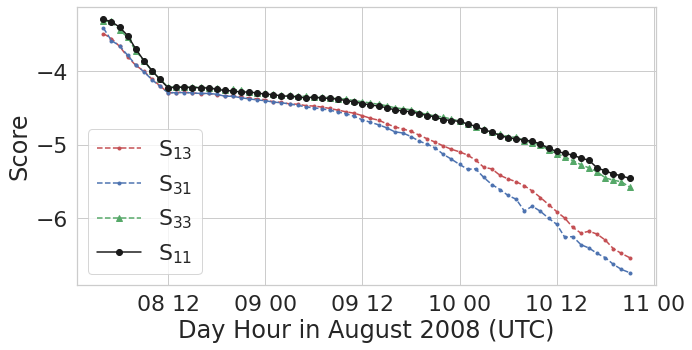

In [139]:
# Compare scores for 0.3um and 3um particle sizes.
# These remain close together for the entire time period.
%autoreload
score = feature_tracking.compare(ft1,ft3,name1='1', name2='3')
plt.savefig('particles_size_comparison_31.png')
plt.show()

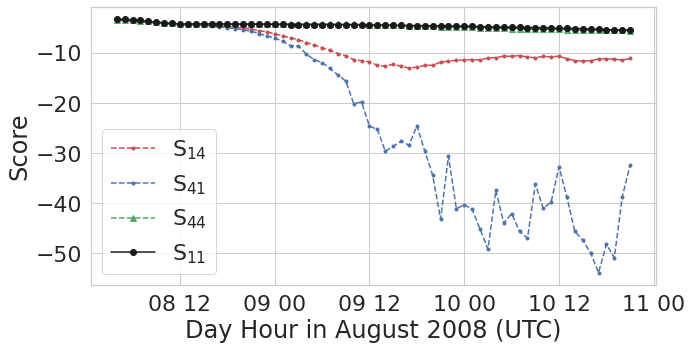

In [143]:
# Figure 7
# Compare scores for largest and smallest particle sizes.
# These start diverging at around August 9, 0 UTC.
%autoreload
score = feature_tracking.compare(ft1,ft4,name1='1', name2='4
plt.savefig('particles_size_comparison_41.png')
plt.show()

2008 08/08 16:00 UTC
1 1


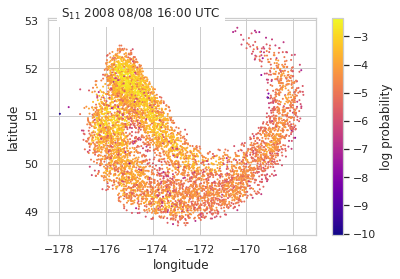

2 2


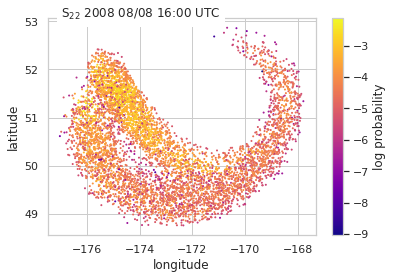

1 2


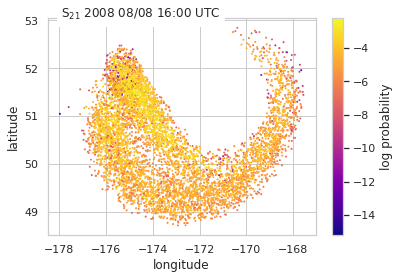

2 1


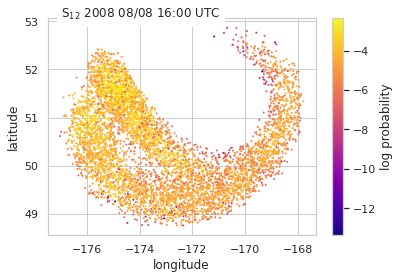

2008 08/08 16:00 UTC
1 1


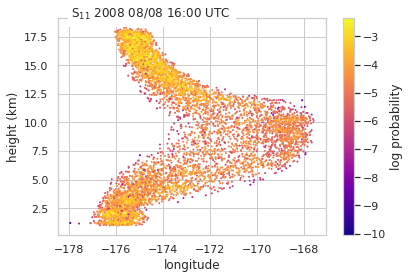

2 2


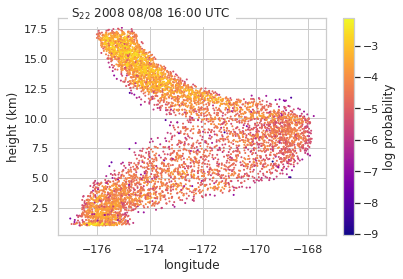

1 2


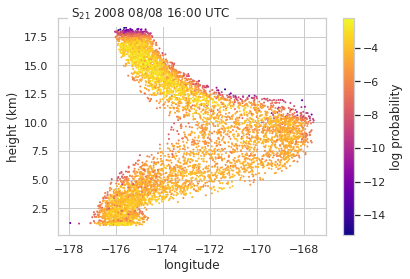

2 1


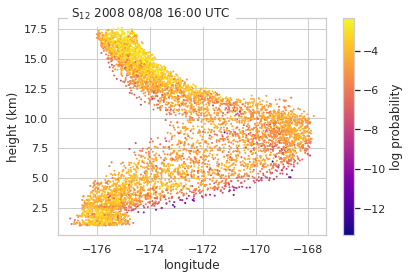

In [134]:
# Plots for August 8, 16Z. Before the scores iverge.
%autoreload
feature_tracking.compare2(ft1,ft4,12)
feature_tracking.compare2(ft1,ft4,12,dim='lat')

2008 08/09 04:00 UTC
1 1
setting xlim [-177, -163]


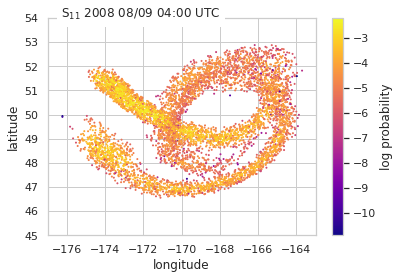

4 4
setting xlim [-177, -163]


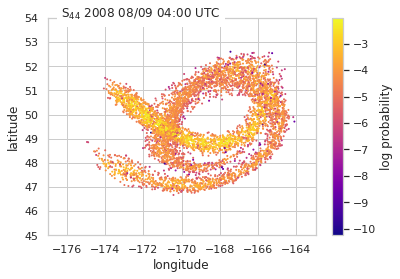

1 4
setting xlim [-177, -163]


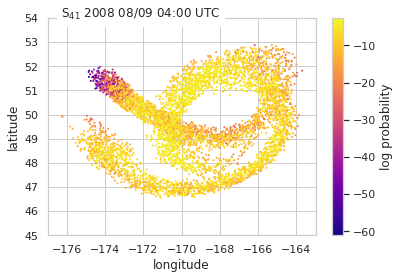

4 1
setting xlim [-177, -163]


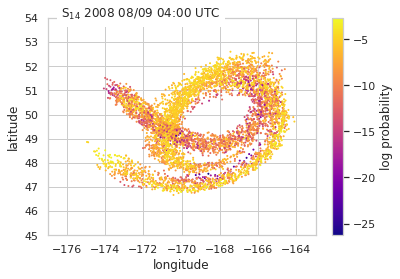

2008 08/09 04:00 UTC
1 1
setting xlim [-177, -163]


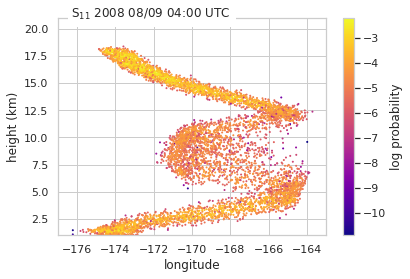

4 4
setting xlim [-177, -163]


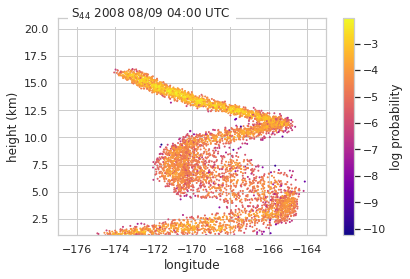

1 4
setting xlim [-177, -163]


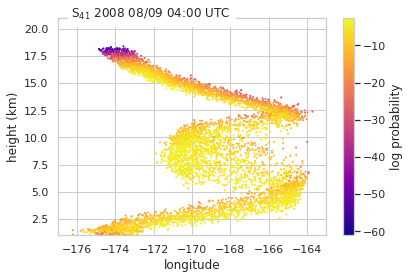

4 1
setting xlim [-177, -163]


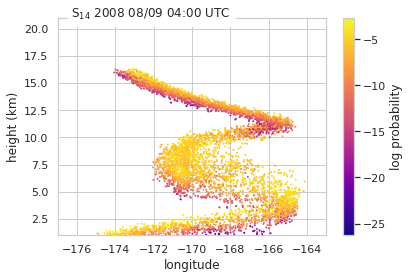

In [135]:
%autoreload
xlim = [-177,-163]
ylim = [45,54]
feature_tracking.compare2(ft1,ft4,24,name1='1',name2='4',xlim=xlim,ylim=ylim)
ylim = [1,21]
feature_tracking.compare2(ft1,ft4,24,name1='1',name2='4',dim='lat',xlim=xlim,ylim=ylim)

2008 08/10 16:00 UTC
1 1
setting xlim [-170, -129]


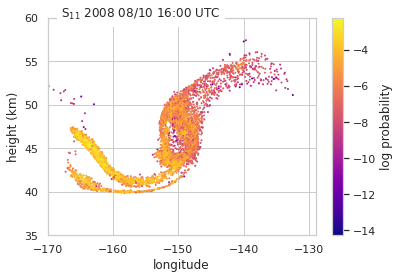

4 4
setting xlim [-170, -129]


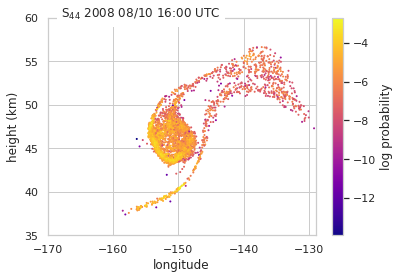

1 4
setting xlim [-170, -129]


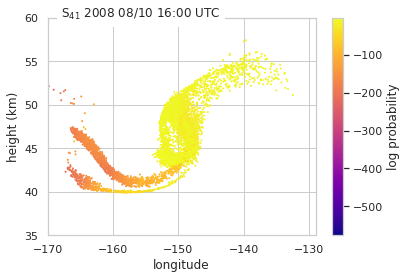

4 1
setting xlim [-170, -129]


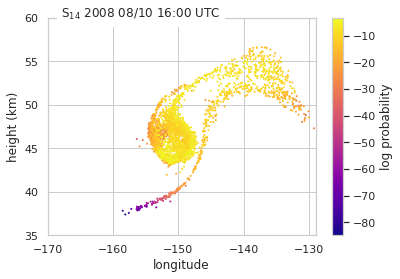

2008 08/10 16:00 UTC
1 1
setting xlim [-170, -129]


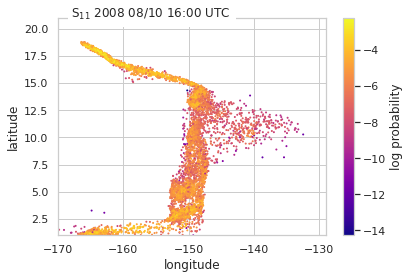

4 4
setting xlim [-170, -129]


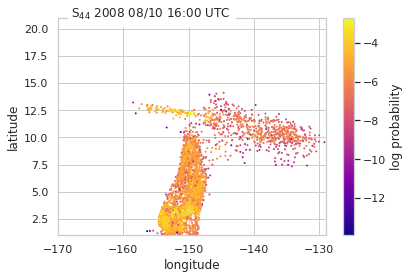

1 4
setting xlim [-170, -129]


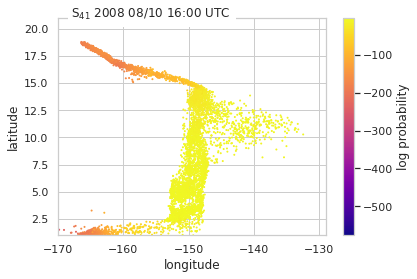

4 1
setting xlim [-170, -129]


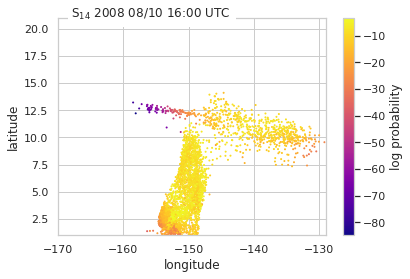

In [132]:
%autoreload
xlim =[-170,-129]
ylim =[35,60]
feature_tracking.compare2(ft1,ft4,60,name1='1',name2='4',xlim=xlim,ylim=ylim)
ylim =[1,21]
feature_tracking.compare2(ft1,ft4,60,name1='1',name2='4',dim='lat',xlim=xlim,ylim=ylim)

2008 08/10 16:00 UTC
1 1
setting xlim [-170, -129]


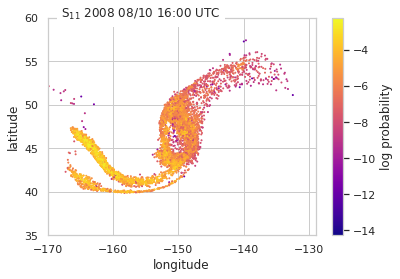

3 3
setting xlim [-170, -129]


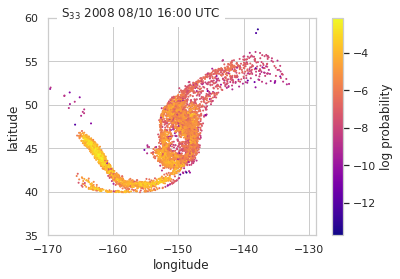

1 3
setting xlim [-170, -129]


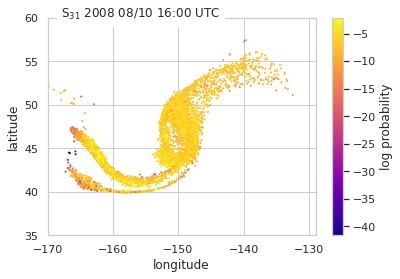

3 1
setting xlim [-170, -129]


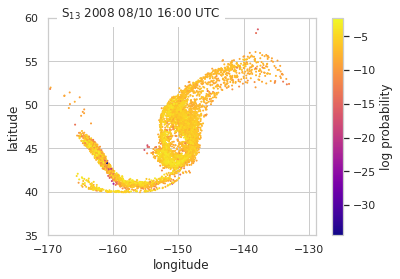

2008 08/10 16:00 UTC
1 1
setting xlim [-170, -129]


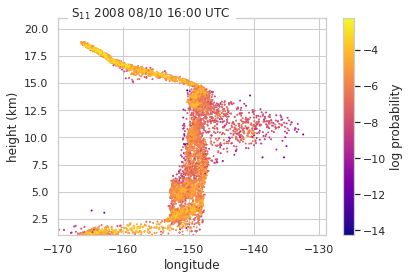

3 3
setting xlim [-170, -129]


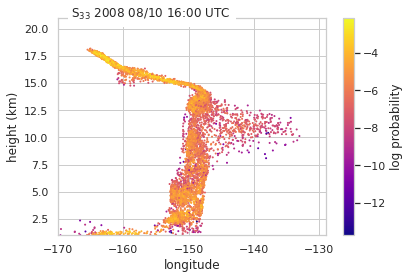

1 3
setting xlim [-170, -129]


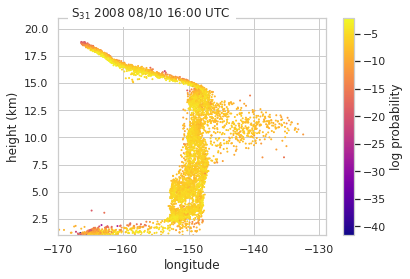

3 1
setting xlim [-170, -129]


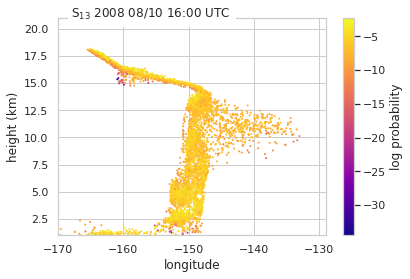

In [136]:
%autoreload
xlim =[-170,-129]
ylim =[35,60]
feature_tracking.compare2(ft1,ft3,60,name1='1',name2='3',xlim=xlim,ylim=ylim)
ylim =[1,21]
feature_tracking.compare2(ft1,ft3,60,name1='1',name2='3',dim='lat',xlim=xlim,ylim=ylim)